# Comparing models for a planar triple-junction solar cell structure - profile calculations

This example uses the same structure as the previous, non-profile calculation example; reading through
that example first will clarify this one.

We are going to take the same structures, but instead of focusing on the wavelength-dependent absorption
in each layer, we're going to look at the absorption profile in the front surface at only a few wavelengths,
again to make sure all the different methods (as listed in the other example) give consistent results.

In [1]:
import numpy as np

# solcore imports
from solcore.structure import Layer
from solcore import material

# rayflare imports
from rayflare.textures import planar_surface
from rayflare.structure import Interface, BulkLayer, Structure
from rayflare.matrix_formalism import process_structure, calculate_RAT
from rayflare.options import default_options
from rayflare.transfer_matrix_method import tmm_structure

# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler

import warnings

warnings.filterwarnings("ignore")

pal = sns.cubehelix_palette(10, start=0.5, rot=-0.9)

cols = cycler("color", pal)

params = {"axes.prop_cycle": cols}

plt.rcParams.update(params)

In [2]:
# Thickness of bottom Ge layer
bulkthick = 300e-6


wavelengths = np.linspace(500, 1000, 7) * 1e-9

pal2 = sns.cubehelix_palette(len(wavelengths), start=0.5, rot=-0.9)

# set options
options = default_options()
options.wavelength = wavelengths
options.project_name = "method_comparison_profile"
options.n_rays = 250
options.n_theta_bins = 3
options.lookuptable_angles = 100
options.parallel = True
options.c_azimuth = 0.001

# set up Solcore materials
Ge = material("Ge")()
GaAs = material("GaAs")()
GaInP = material("GaInP")(In=0.5)
Ag = material("Ag")()
SiN = material("Si3N4")()
Air = material("Air")()
Ta2O5 = material("TaOx1")()  # Ta2O5 (SOPRA database)
MgF2 = material("MgF2")()  # MgF2 (SOPRA database)


front_materials = [
    Layer(120e-9, MgF2),
    Layer(74e-9, Ta2O5),
    Layer(464e-9, GaInP),
    Layer(1682e-9, GaAs),
]
back_materials = [Layer(100e-9, SiN)]

fig2, axes2 = plt.subplots(2, 2, figsize=(9, 7))
ax5 = axes2[0, 0]
ax6 = axes2[0, 1]
ax7 = axes2[1, 0]
ax8 = axes2[1, 1]

plt.close()

This is so far the same as the previous example, except that we are using fewer wavelengths and we changed
the project_name. The key difference in the
subsequent cells is that we are going to specify that we want to do a profile calculation (which requires extreme
computations, which may be time-consuming, and so are not done by default) by specifying the prof_layers argument in
the Interfaces.

In [3]:
front_surf = Interface(
    "TMM",
    layers=front_materials,
    name="GaInP_GaAs_TMM",
    coherent=True,
    prof_layers=[1, 2, 3, 4],
)
back_surf = Interface(
    "TMM", layers=back_materials, name="SiN_Ag_TMM", coherent=True, prof_layers=[1]
)


bulk_Ge = BulkLayer(bulkthick, Ge, name="Ge_bulk")  # bulk thickness in m

SC = Structure([front_surf, bulk_Ge, back_surf], incidence=Air, transmission=Ag)

process_structure(SC, options)

results_TMM_Matrix = calculate_RAT(SC, options)

profile = results_TMM_Matrix[2]

prof_plot = profile[0]

depths = np.linspace(
    0, len(prof_plot[0, :]) * options["depth_spacing"] * 1e9, len(prof_plot[0, :])
)

for i1 in np.arange(len(wavelengths)):
    ax5.plot(
        depths,
        prof_plot[i1, :],
        color=pal2[i1],
        label=str(round(options["wavelengths"][i1] * 1e9, 1)),
    )

ax5.set_ylabel("Absorbed energy density (nm$^{-1}$)")
ax5.legend(title="Wavelength (nm)")
ax5.set_xlabel("Distance into surface (nm)")
ax5.autoscale(tight=True)

plt.close()

INFO: Making matrix for planar surface using TMM for element 0 in structure
INFO: Making matrix for planar surface using TMM for element 2 in structure
INFO: Initial intensity: [1. 1. 1. 1. 1. 1. 1.]
INFO: After iteration 1: maximum power fraction remaining = 0.0


In [4]:
surf = planar_surface()  # [texture, flipped texture]

front_surf = Interface(
    "RT_TMM",
    layers=front_materials,
    texture=surf,
    name="GaInP_GaAs_RT",
    coherent=True,
    prof_layers=[1, 2, 3, 4],
)
back_surf = Interface(
    "RT_TMM",
    layers=back_materials,
    texture=surf,
    name="SiN_Ag_RT_50k",
    coherent=True,
    prof_layers=[1],
)

SC = Structure([front_surf, bulk_Ge, back_surf], incidence=Air, transmission=Ag)

process_structure(SC, options)

results_RT = calculate_RAT(SC, options)

profile = results_RT[2]

prof_plot = profile[0]

depths = np.linspace(
    0, len(prof_plot[0, :]) * options["depth_spacing"] * 1e9, len(prof_plot[0, :])
)

for i1 in np.arange(len(wavelengths)):
    ax6.plot(
        depths,
        prof_plot[i1, :],
        color=pal2[i1],
        label=str(round(options["wavelengths"][i1] * 1e9, 1)),
    )

ax6.set_ylabel("Absorbed energy density (nm$^{-1}$)")
ax6.set_xlabel("Distance into surface (nm)")
ax6.autoscale(tight=True)

plt.close()

INFO: Making RT/TMM lookuptable for element 0 in structure
INFO: Making RT/TMM lookuptable for element 2 in structure
INFO: Ray tracing with TMM lookup table for element 0 in structure
INFO: Calculating matrix only for incidence theta/phi
INFO: RT calculation for wavelength = 500.00000000000006 nm
INFO: RT calculation for wavelength = 1000.0000000000001 nm
INFO: RT calculation for wavelength = 666.6666666666667 nm
INFO: RT calculation for wavelength = 750.0 nm
INFO: RT calculation for wavelength = 916.6666666666666 nm
INFO: RT calculation for wavelength = 583.3333333333334 nm
INFO: RT calculation for wavelength = 833.3333333333334 nm
INFO: RT calculation for wavelength = 583.3333333333334 nm
INFO: RT calculation for wavelength = 666.6666666666667 nm
INFO: RT calculation for wavelength = 750.0 nm
INFO: RT calculation for wavelength = 833.3333333333334 nm
INFO: RT calculation for wavelength = 916.6666666666666 nm
INFO: RT calculation for wavelength = 1000.0000000000001 nm
INFO: RT calcul

In [5]:
front_surf = Interface(
    "RCWA",
    layers=front_materials,
    name="GaInP_GaAs_RCWA",
    coherent=True,
    d_vectors=((500, 0), (0, 500)),
    rcwa_orders=2,
    prof_layers=[1, 2, 3, 4],
)
back_surf = Interface(
    "RCWA",
    layers=back_materials,
    name="SiN_Ag_RCWA",
    coherent=True,
    d_vectors=((500, 0), (0, 500)),
    rcwa_orders=2,
    prof_layers=[1],
)


SC = Structure([front_surf, bulk_Ge, back_surf], incidence=Air, transmission=Ag)

process_structure(SC, options)

results_RCWA_Matrix = calculate_RAT(SC, options)

profile = results_RCWA_Matrix[2]

prof_plot = profile[0]

depths = np.linspace(
    0, len(prof_plot[0, :]) * options["depth_spacing"] * 1e9, len(prof_plot[0, :])
)

for i1 in np.arange(len(wavelengths)):
    ax7.plot(
        depths,
        prof_plot[i1, :],
        color=pal2[i1],
        label=str(round(options["wavelengths"][i1] * 1e9, 1)),
    )

ax7.set_ylabel("Absorbed energy density (nm$^{-1}$)")
ax7.set_xlabel("Distance into surface (nm)")
ax7.autoscale(tight=True)

plt.close()

INFO: RCWA calculation for element 0 in structure
INFO: RCWA calculation for wavelength = 583.3333333333334 nm
INFO: RCWA calculation for wavelength = 1000.0000000000001 nm
INFO: RCWA calculation for wavelength = 666.6666666666667 nm
INFO: RCWA calculation for wavelength = 916.6666666666666 nm
INFO: RCWA calculation for wavelength = 833.3333333333334 nm
INFO: RCWA calculation for wavelength = 750.0 nm
INFO: RCWA calculation for wavelength = 500.00000000000006 nm
INFO: RCWA calculation for wavelength = 500.00000000000006 nm
INFO: RCWA calculation for wavelength = 583.3333333333334 nm
INFO: RCWA calculation for wavelength = 666.6666666666667 nm
INFO: RCWA calculation for wavelength = 750.0 nm
INFO: RCWA calculation for wavelength = 916.6666666666666 nm
INFO: RCWA calculation for wavelength = 1000.0000000000001 nm
INFO: RCWA calculation for wavelength = 833.3333333333334 nm
INFO: RCWA calculation for element 2 in structure
INFO: RCWA calculation for wavelength = 500.00000000000006 nm
INFO

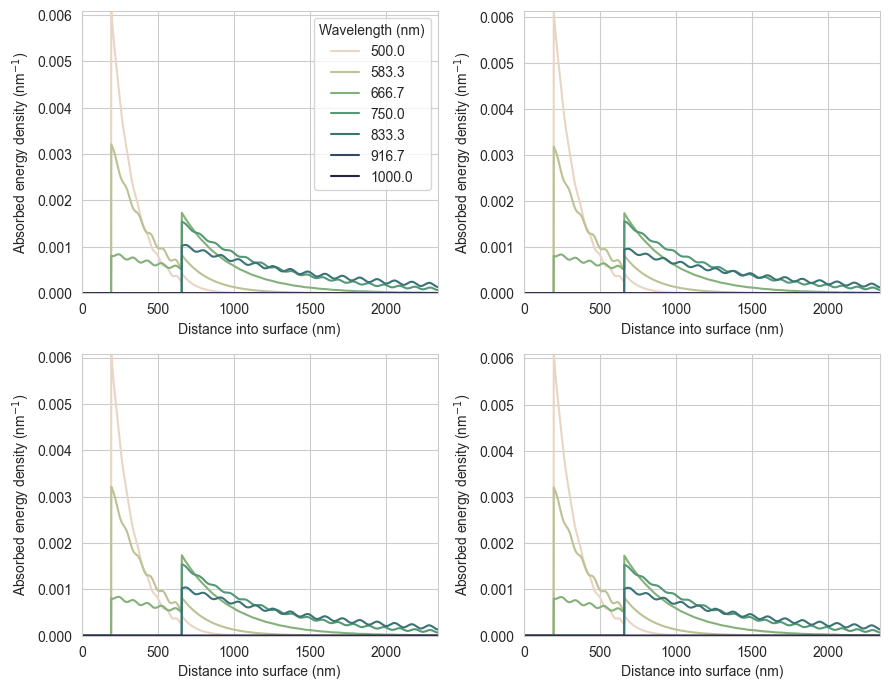

In [6]:
all_layers = front_materials + [Layer(bulkthick, Ge)] + back_materials

coh_list = len(front_materials) * ["c"] + ["i"] + ["c"]
options.coherency_list = coh_list
options.coherent = False

OS_layers = tmm_structure(
    all_layers, incidence=Air, transmission=Ag, no_back_reflection=False
)

TMM_res = OS_layers.calculate(options, profile=[1, 2, 3, 4, 5, 6])

for i1 in np.arange(len(wavelengths)):
    ax8.plot(
        depths,
        TMM_res["profile"][i1, : len(depths)],
        color=pal2[i1],
        label=str(round(options["wavelengths"][i1] * 1e9, 1)),
    )

ax8.set_ylabel("Absorbed energy density (nm$^{-1}$)")
ax8.set_xlabel("Distance into surface (nm)")

ax8.autoscale(tight=True)

fig2.tight_layout()
fig2